## Advanced Machine Learning - SciKit Learn
### with Andreas Mueller 

# Cross-Validation
First, import packages and load iris dataset: 150 samples (X), and 4 features (y)
* Split the whole dataset into Training set (75%) and Test set (25%)
* Train classifier (e.g., K Nearest Neighbors) on TRAIN data using fit method
* Evaluate the model on the TEST set using the score method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
n_samples = X.shape[0]
print(X.shape)
print(y.shape)
print(y)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Validation with a training / test split
* [                      ALL DATA (100%)                      ]
* [           Training Data (75%)    ] / [   Test Data (25%)    ]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [5]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

1.0

#### Accuracy measure indicates 100% of TEST set was correctly classified 
* High estimate may not be that trustworthy, may need another estimate of how classifier generalizes
* We can get a better sense of the data, by sampling from the entire data set, using each parts as test sets. 

## K-Fold Cross-Validation for more robust estimates
Entire dataset is divided into k-folds, typically into either 10 or 5 equal portions
For each iteraction, one fold is held out as TEST set, remaining folds used as TRAIN set. 
Thus, each fold in dataset is used as the TEST sample at least once, take the average of scores as accuracy
* Split 1: [fold 1]   fold 2    fold 3    fold 4    fold 5
* Split 2:  fold 1   [fold 2]   fold 3    fold 4    fold 5
* Split 3:  fold 1    fold 2   [fold 3]   fold 4    fold 5
* Split 4:  fold 1    fold 2    fold 3   [fold 4]   fold 5
* Split 5:  fold 1    fold 2    fold 3    fold 4   [fold 5]

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y)
print(scores)
print(np.mean(scores))

[ 0.98039216  0.98039216  1.        ]
0.986928104575


NOTE: Better to use stratified strategy for classification when doing k-fold cross-validation, which ensures the class proportions in the dataset are represented in each fold. For regression standard k-fold is used. 

In [8]:
cross_val_score(classifier, X, y, cv=5)

array([ 0.96666667,  1.        ,  0.93333333,  0.96666667,  1.        ])

## Custom cross-validation iterators
* Many options for cross-validation in sklearn: KFold, StratifiedKFold, ShuffleSplit,
* Each cross-validation is a generator so sets of indices for the TRAIN and TEST sets
* Stratified K-fold cross-val takes some samples from beginning, some from end in each of folds

In [9]:
from sklearn.cross_validation import KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut

In [10]:
cv = StratifiedKFold(iris.target, n_folds=5)
for train, test in cv:
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


##### We can visualize the splits in cross-val with helper function
* Plots an array of tests sets in each iteration; first, for Stratified K-fold with 5 folds
* In this matrix, each column corresponds to a sample in the data set
* Each rolw corresponds to one iteration of Stratified K-fold cross-val, 
* Yellow parts are the test sets for each iteration

In [11]:
def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks)

### Compare Stratified K-fold with Standard K-fold cross-validation
* First fifth of data is in the first test set, second fifth in second set, and so on, etc. 
* However, for the iris dataset set we are using, many of the folds only contain one class. 
* Solve this problem using random permutation, using shuffle parameter

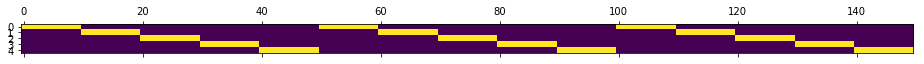

In [12]:
cv = StratifiedKFold(y, n_folds=5)
plot_cv(cv, n_samples)

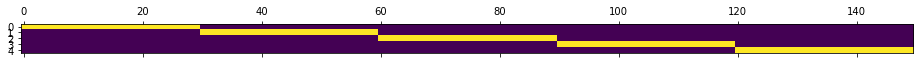

In [13]:
cv = KFold(n_samples, n_folds=5)
plot_cv(cv, n_samples)

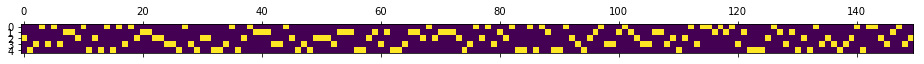

In [14]:
cv = KFold(n_samples, n_folds=5, shuffle=True)
plot_cv(cv, n_samples)

### Compare 5-fold to 10-fold Cross-validation
* We have 10 iterations, but TEST sets are smaller, only half as big as for 5-fold cross-val, across iterations
* Increasing the number of folds gives larger training set, but more repetitions, slower evaluations
* Too many folds also means that TEST set gets very small, larger variation between outcomes

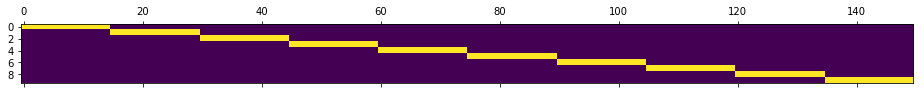

In [15]:
cv = KFold(n_samples, n_folds=10)
plot_cv(cv, n_samples)

### Suffle Spllit solves some of these problems
* Splits off random portion of the data repeatedly 
* Allows user to specify number of repetitions and training set size, independently

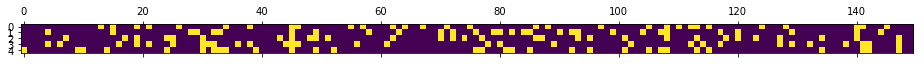

In [16]:
# Five iterations, and test set 20%

cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
plot_cv(cv, n_samples)

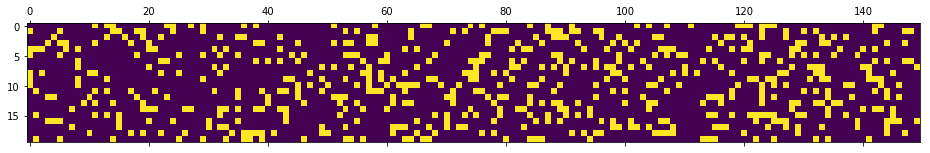

In [17]:
# Increase number of iterations to 20, with same test set size

cv = ShuffleSplit(n_samples, n_iter=20, test_size=.2)
plot_cv(cv, n_samples)

##### We can use all of these cross-validation iterators using cross-val score function
* Giving cross-validation iterator as cv argument

In [ ]:
cv = ShuffleSplit(n_samples, n_iter=5, test_size=.2)
cross_val_score(classifier, X, y, cv=cv)